In [ ]:
Fitting data with formula

Gnuplot is capable to fit given data with functions given as formulas. This notebook contain several examples about how to fit data with GnuplotRB.


## When installing a new Gem - Totally shut down notebook and restart

In [2]:
cmd = `sudo gem install daru`

"Successfully installed backports-3.8.0\n*************************************************************************\nThank you for installing daru!\n\n  oOOOOOo\n ,|    oO\n//|     |\n\\\\|     |\n `|     |\n  `-----`\n\n\nHope you love daru! For enhanced interactivity and better visualizations,\nconsider using gnuplotrb and nyaplot with iruby. For statistics use the\nstatsample family.\n\nRead the README for interesting use cases and examples.\n\nCheers!\n*************************************************************************\nSuccessfully installed daru-0.1.6\nParsing documentation for backports-3.8.0\nInstalling ri documentation for backports-3.8.0\nParsing documentation for daru-0.1.6\nInstalling ri documentation for daru-0.1.6\nDone installing documentation for backports, daru after 7 seconds\n2 gems installed\n"

In [6]:
cmd = `bundle update daru`

"Could not locate Gemfile\n"

In [1]:
require 'daru'


Install the spreadsheet gem version ~>1.1.1 for using spreadsheet functions.

Install the mechanize gem version ~>2.7.5 for using mechanize functions.


"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

true

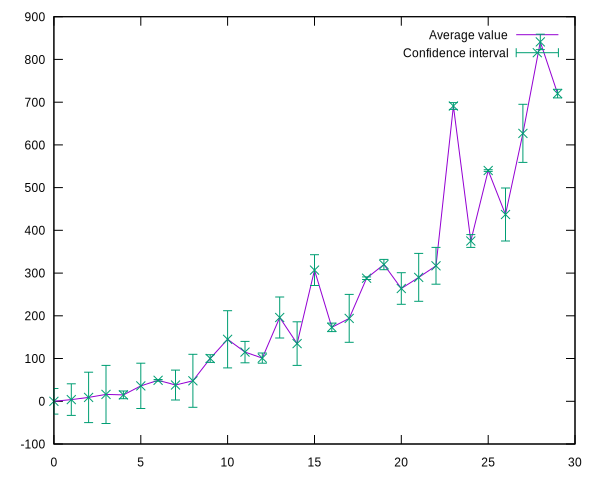

In [2]:
require 'daru'
require 'gnuplotrb'
include GnuplotRB
include Fit

rows = (1..30).map do |i|
  [i**2 * (rand(4) + 3) / 5, rand(70) + 1]
end
df = Daru::DataFrame.rows(rows, order: [:Value, :Error], name: 'Confidence interval')

random_points = Plot.new(
  [df[:Value], with: 'lines', title: 'Average value'],
  [df, with: 'err']
)

In [3]:
some_poly = fit(df, function: "a*x**3 + b*x + c", initials: {a: 1, b: 1, c: 1})
some_poly[:coefficients]

{:a=>0.0217847, :b=>7.68214, :c=>-2.43151}

In [4]:
some_poly[:formula_ds].data

" 0.0217847*x**3 + 7.68214*x + -2.43151 "

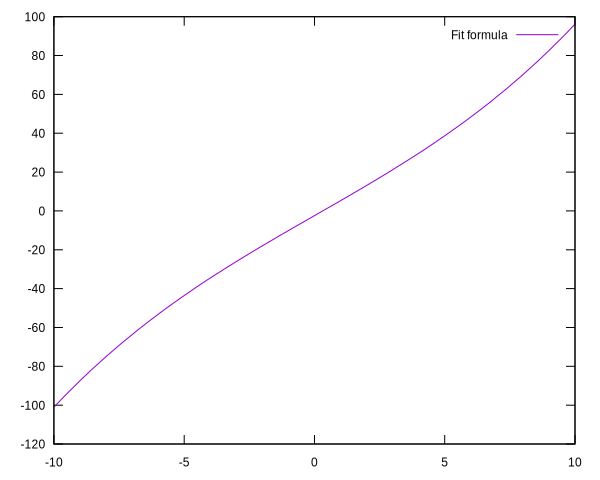

In [5]:
some_poly[:formula_ds]

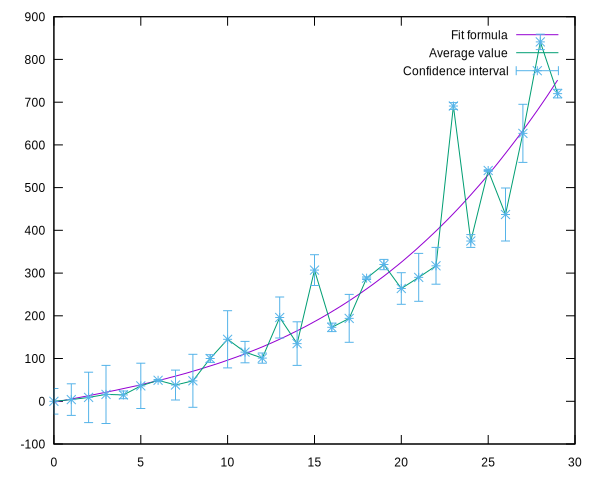

In [6]:
random_points << some_poly[:formula_ds]

You can find more information about how gnuplot's fitting work in [gnuplot doc](http://www.gnuplot.info/docs_5.0/gnuplot.pdf).

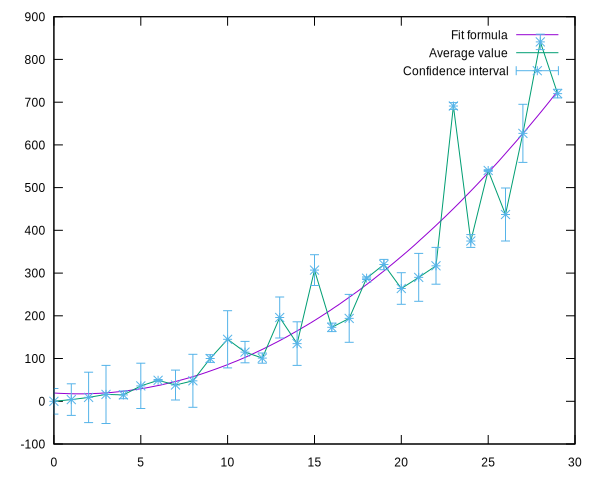

In [7]:
poly = fit_poly(df)
random_points.add_dataset(poly[:formula_ds])

In [8]:
frames = (2..9).map { |i| random_points.add_dataset(fit_poly(df, degree: i)[:formula_ds].options(title: "Fit (degree #{i})", lw: 2)) }
Animation.new(*frames, animate: { delay: 150 } )

#<GnuplotRB::Animation:0x0000000100da60 @plots=Hamster::Vector[#<GnuplotRB::Plot:0x00000001bd7d28 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000001bd8070 @type=:math_function, @data=" 19.3117*x**0 + -2.6673*x**1 + 0.931844*x**2 ", @options=Hamster::Hash[:title => "Fit (degree 2)", :lw => 2]>, #<GnuplotRB::Dataset:0x000000019a67e8 @type=:datablock, @data=#<GnuplotRB::Datablock:0x000000019a64a0 @stored_in_file=false, @data="0 0\n1 4\n2 9\n3 16\n4 15\n5 36\n6 49\n7 38\n8 48\n9 100\n10 145\n11 115\n12 101\n13 196\n14 135\n15 307\n16 173\n17 194\n18 288\n19 320\n20 264\n21 290\n22 317\n23 691\n24 375\n25 540\n26 437\n27 627\n28 841\n29 720\n">, @options=Hamster::Hash[:with => "lines", :title => "Average value", :using => "1:2"]>, #<GnuplotRB::Dataset:0x0000000152f548 @type=:datablock, @data=#<GnuplotRB::Datablock:0x0000000152f110 @stored_in_file=false, @data="0 0 30\n1 4 37\n2 9 59\n3 16 68\n4 15 9\n5 36 53\n6 49 2\n7 38 35\n8 48 62\n9 100 9\n10 145 67\n11 115 25\n12 101 12\n13 196 48\n14 135 51\n15 307 36\n16 173 10\n17 194 56\n18 288 3\n19 320 12\n20 264 37\n21 290 56\n22 317 43\n23 691 8\n24 375 15\n25 540 2\n26 437 62\n27 627 68\n28 841 18\n29 720 10\n">, @options=Hamster::Hash[:with => "err", :title => "Confidence interval", :using => "1:2:3"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x000000020f53c8 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x000000020f5918 @type=:math_function, @data=" -17.7148*x**0 + 14.0896*x**1 + -0.537463*x**2 + 0.0337772*x**3 ", @options=Hamster::Hash[:title => "Fit (degree 3)", :lw => 2]>, #<GnuplotRB::Dataset:0x000000019a67e8 @type=:datablock, @data=#<GnuplotRB::Datablock:0x000000019a64a0 @stored_in_file=false, @data="0 0\n1 4\n2 9\n3 16\n4 15\n5 36\n6 49\n7 38\n8 48\n9 100\n10 145\n11 115\n12 101\n13 196\n14 135\n15 307\n16 173\n17 194\n18 288\n19 320\n20 264\n21 290\n22 317\n23 691\n24 375\n25 540\n26 437\n27 627\n28 841\n29 720\n">, @options=Hamster::Hash[:with => "lines", :title => "Average value", :using => "1:2"]>, #<GnuplotRB::Dataset:0x0000000152f548 @type=:datablock, @data=#<GnuplotRB::Datablock:0x0000000152f110 @stored_in_file=false, @data="0 0 30\n1 4 37\n2 9 59\n3 16 68\n4 15 9\n5 36 53\n6 49 2\n7 38 35\n8 48 62\n9 100 9\n10 145 67\n11 115 25\n12 101 12\n13 196 48\n14 135 51\n15 307 36\n16 173 10\n17 194 56\n18 288 3\n19 320 12\n20 264 37\n21 290 56\n22 317 43\n23 691 8\n24 375 15\n25 540 2\n26 437 62\n27 627 68\n28 841 18\n29 720 10\n">, @options=Hamster::Hash[:with => "err", :title => "Confidence interval", :using => "1:2:3"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000001c49310 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000001c496f8 @type=:math_function, @data=" 2.25022*x**0 + -2.16202*x**1 + 2.08485*x**2 + -0.108424*x**3 + 0.00245175*x**4 ", @options=Hamster::Hash[:title => "Fit (degree 4)", :lw => 2]>, #<GnuplotRB::Dataset:0x000000019a67e8 @type=:datablock, @data=#<GnuplotRB::Datablock:0x000000019a64a0 @stored_in_file=false, @data="0 0\n1 4\n2 9\n3 16\n4 15\n5 36\n6 49\n7 38\n8 48\n9 100\n10 145\n11 115\n12 101\n13 196\n14 135\n15 307\n16 173\n17 194\n18 288\n19 320\n20 264\n21 290\n22 317\n23 691\n24 375\n25 540\n26 437\n27 627\n28 841\n29 720\n">, @options=Hamster::Hash[:with => "lines", :title => "Average value", :using => "1:2"]>, #<GnuplotRB::Dataset:0x0000000152f548 @type=:datablock, @data=#<GnuplotRB::Datablock:0x0000000152f110 @stored_in_file=false, @data="0 0 30\n1 4 37\n2 9 59\n3 16 68\n4 15 9\n5 36 53\n6 49 2\n7 38 35\n8 48 62\n9 100 9\n10 145 67\n11 115 25\n12 101 12\n13 196 48\n14 135 51\n15 307 36\n16 173 10\n17 194 56\n18 288 3\n19 320 12\n20 264 37\n21 290 56\n22 317 43\n23 691 8\n24 375 15\n25 540 2\n26 437 62\n27 627 68\n28 841 18\n29 720 10\n">, @options=Hamster::Hash[:with => "err", :title => "Confidence interval", :using => "1:2:3"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000001fd0b50 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000001fd0e20

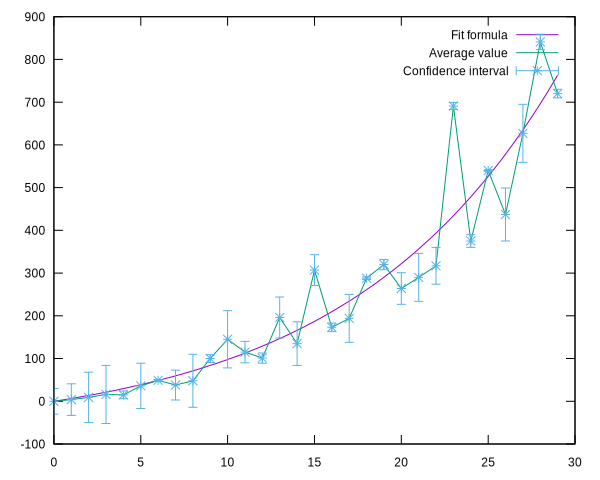

In [10]:
exp = fit_exp(df)
random_points.add_dataset(exp[:formula_ds])

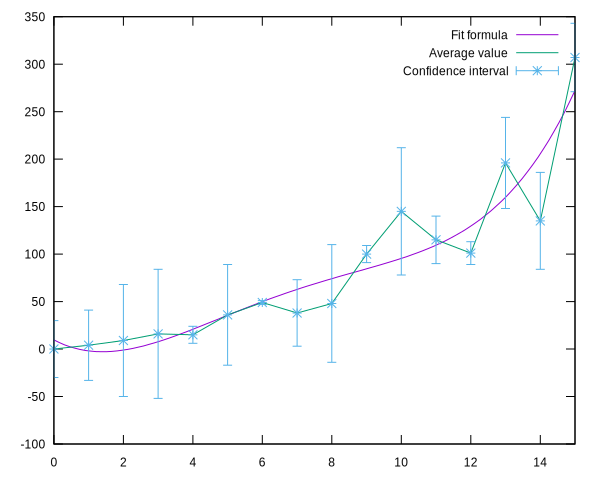

In [11]:
ranged_poly = fit_poly(df, degree: 4, term_options: { xrange: 0..15})
random_points.add_dataset(ranged_poly[:formula_ds]).xrange(0..15)

## Multiple Plots

In [13]:
require 'gnuplotrb'
include GnuplotRB

sinx = Plot.new('sin(x)', title: 'Sin')
exp = Plot.new('exp(x)', title: 'Exp')
log = Plot.new('log(x)', title: 'Log')
sphere = Splot.new(
  ['sin(u)*cos(v), sin(u)*sin(v), cos(u)', title: 'Sphere'],
  parametric: true,
  urange: 0..Math::PI,
  vrange: 0..2*Math::PI,
  title: 'sphere',
  hidden3d: true,
  isosamples: 30
)
nil

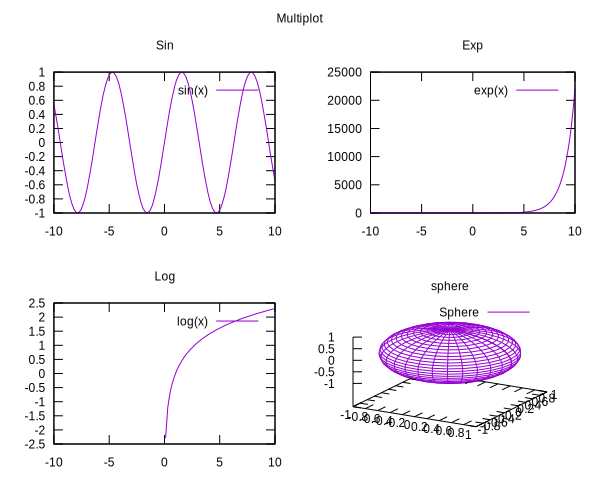

In [14]:
rows, cols = 2, 2
basic_four = Multiplot.new(sinx, exp, log, sphere, layout: [rows, cols])

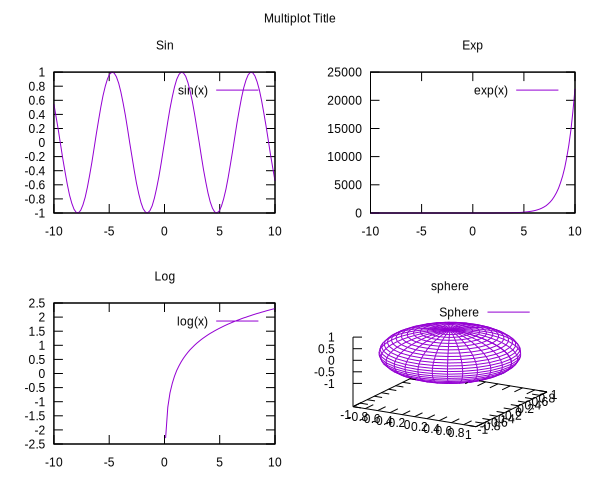

In [16]:
basic_four.title('Multiplot Title')

# Overlay

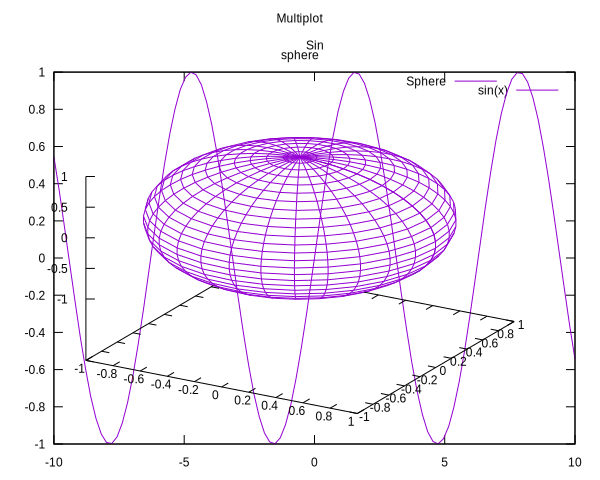

In [21]:
basic_two = Multiplot.new(sinx, sphere, layout: [1,1])

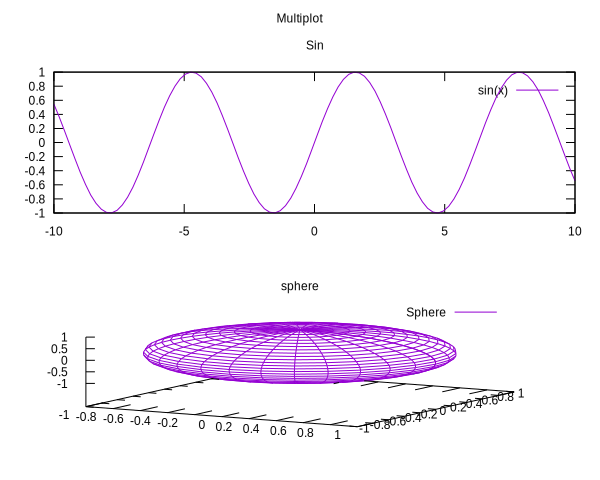

In [22]:
basic_two.layout(2,1)

(pry):76: warning: GnuplotRB::Splot#respond_to?(:to_hash) is old fashion which takes only one parameter
/var/lib/gems/2.3.0/gems/gnuplotrb-0.3.4/lib/gnuplotrb/mixins/plottable.rb:68: warning: respond_to? is defined here


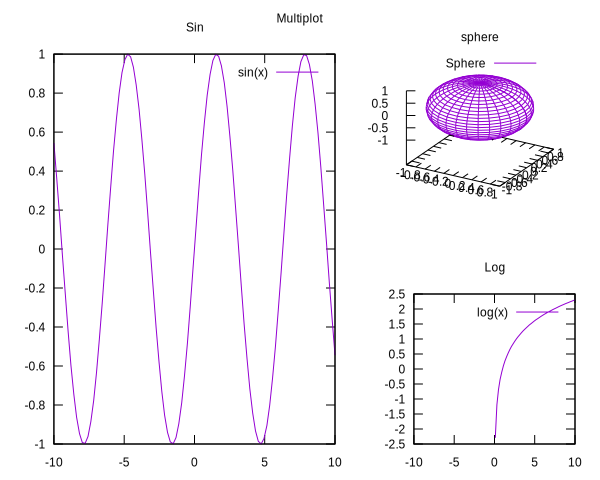

In [23]:
minisinx = sinx.options(size: [0.6,1.0], origin: [0,0])
minilog = log.options(size: [0.4,0.5], origin: [0.6,0])
minisphere = sphere.options(size: [0.4,0.5], origin: [0.6,0.5])
Multiplot.new(minisinx, minilog, minisphere)